In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def contar_clases_en_particion(root_path, partition_name):
    """
    Cuenta cuántas imágenes válidas hay en cada clase dentro de una partición.
    Solo cuenta archivos .png, .jpg y .jpeg
    """
    part_path = os.path.join(root_path, partition_name)
    clases = ["fractured", "not fractured"]  # 👈 nombres reales de tus carpetas
    extensiones_validas = (".png", ".jpg", ".jpeg")
    conteos = {}
    
    for cls in clases:
        cls_path = os.path.join(part_path, cls)
        if os.path.isdir(cls_path):
            archivos = [
                f for f in os.listdir(cls_path)
                if os.path.isfile(os.path.join(cls_path, f))
                and f.lower().endswith(extensiones_validas)
            ]
            conteos[cls] = len(archivos)
        else:
            conteos[cls] = 0
    return conteos


def analizar_dataset(root_path):
    """
    Analiza todas las particiones (train, val, test) del dataset.
    Retorna un diccionario con conteos totales y proporciones.
    """
    particiones = ["train", "val", "test"]
    resumen = {}
    for part in particiones:
        conteos = contar_clases_en_particion(root_path, part)
        total = sum(conteos.values())
        if total > 0:
            proporciones = {cls: conteos[cls] / total for cls in conteos}
        else:
            proporciones = {cls: 0 for cls in conteos}
        resumen[part] = {
            "conteos": conteos,
            "total": total,
            "proporciones": proporciones
        }
    return resumen

In [13]:
ruta_dataset = r"C:/Users/hamga/Documents/repo/ProcesamientoYClasificacionDeDatosProyecto/Bone_Fracture_Binary_Classification"

In [16]:
resumen = analizar_dataset(ruta_dataset)

for part, info in resumen.items():
    print(f"Partición: {part}")
    print(f"--Total imágenes: {info['total']}")
    for cls, cnt in info["conteos"].items():
        prop = info["proporciones"][cls]
        print(f"   {cls}: {cnt} imágenes — proporción: {prop:.2%}")
    print()

Partición: train
--Total imágenes: 9246
   fractured: 4606 imágenes — proporción: 49.82%
   not fractured: 4640 imágenes — proporción: 50.18%

Partición: val
--Total imágenes: 829
   fractured: 337 imágenes — proporción: 40.65%
   not fractured: 492 imágenes — proporción: 59.35%

Partición: test
--Total imágenes: 506
   fractured: 238 imágenes — proporción: 47.04%
   not fractured: 268 imágenes — proporción: 52.96%



In [15]:
rows = []
for part, info in resumen.items():
    for cls, cnt in info["conteos"].items():
        rows.append({
            "Partición": part,
            "Clase": cls,
            "Conteo": cnt,
            "Proporción": info["proporciones"][cls]
        })

df_resumen = pd.DataFrame(rows)
df_resumen

,Partición,Clase,Conteo,Proporción
0,train,fractured,4606,0.498161
1,train,not fractured,4640,0.501839
2,val,fractured,337,0.406514
3,val,not fractured,492,0.593486
4,test,fractured,238,0.470356
5,test,not fractured,268,0.529644


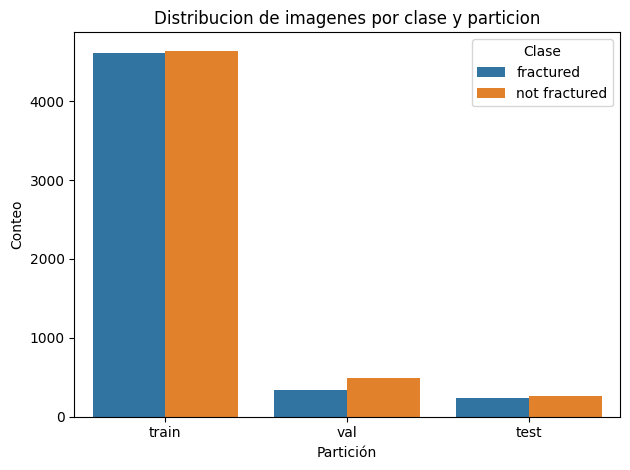

In [20]:
sns.barplot(data=df_resumen, x="Partición", y="Conteo", hue="Clase")
plt.title("Distribucion de imagenes por clase y particion")
plt.tight_layout()
plt.show()